In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

Question 1

I was getting a certificate command error when trying to read the file through the URL so the professor told me to download the file and read it in as a txt file. This question reads the file in, separates the columns by spaces, and assings column names.

In [4]:
df = pd.read_csv('clinton1.txt', sep = ' \s+', engine = 'python',\
                   names=['county', 'percentVoting', 'age', 'savings', \
                          'income', 'percent_poverty', 'percent_veterans', 'percent_female', \
                          'pop_density', 'percent_nursing', 'crime_index'])
df[:10]

,county,percentVoting,age,savings,income,percent_poverty,percent_veterans,percent_female,pop_density,percent_nursing,crime_index
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141
5,"Butler, AL",47.43,33.5,75887,12015,27.1,9.48,53.25,28.1,7.98,266
6,"Calhoun, AL",38.44,32.7,76073,15162,18.0,11.95,51.66,190.8,4.81,560
7,"Chambers, AL",45.36,34.8,40498,13887,18.8,10.52,52.77,62.1,6.15,218
8,"Cherokee, AL",53.61,36.3,56386,13936,15.4,9.29,50.82,35.8,5.61,51
9,"Chilton, AL",34.19,34.0,52230,14036,18.6,9.48,51.41,47.8,3.58,296


Question 2

This question uses dmatrices to take in a formula string and then constructs a model. The results give the p-values for each regressor. The regressors called age and crime_index have the worst p-values.

In [5]:
y, X = dmatrices('percentVoting ~ age + savings + income + percent_poverty + percent_veterans + percent_female + pop_density + percent_nursing + crime_index', data=df, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
result.pvalues

Intercept            5.457367e-11
age                  2.386186e-01
savings              4.859660e-10
income               1.761381e-02
percent_poverty     9.526970e-100
percent_veterans     3.852591e-04
percent_female       4.425751e-23
pop_density          8.177372e-22
percent_nursing      5.246414e-03
crime_index          1.419496e-01
dtype: float64

Question 3

This question defines a function called formula which takes in 1 parameter. The parameter is a list of regressors. Then, the function concatenates all of the individual regressors within the list and returns a formula that regresses percentVoting on these regressors.

In [6]:
def formula(list):
    return 'percentVoting ~ ' + " + ".join(list)
formula(['age', 'savings'])

'percentVoting ~ age + savings'

Question 4

This question defines a function called rsquared which takes in 1 parameter. The parameter is also a list of regressors. Within the function, dmatrices is used to take in a formula and create a model. Then, the rsquared value is returned.

In [7]:
def rsquared(reg):
    y, X = dmatrices(formula(reg), data=df, return_type = 'dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    return result.rsquared

rsquared(['age', 'savings'])

0.01976709665957599

Question 5

This question defines a function called best_next_regressor with 2 parameters. These parameters are a list of current regressors and a list of all of the regressors. An empty dictionary is declared. Then, a for loop is used to iterate through all of the regressors and calculate the r-squared values. The dictionary is populated with each regressor and its corresponding r-squared value. Then, the dictionary is sorted in descending order and the function returns the best regressor which means the highest r-squared value.

In [8]:
current_regressor_list = ['age', 'income']
all_regressors_list = ['age', 'savings', 'income', 'percent_poverty', 'percent_veterans', 'percent_female', 'pop_density', 'percent_nursing', 'crime_index']

def best_next_regressor(current_regressor_list, all_regressor_list):  
    max_dict = {}
    
    for x in all_regressor_list:
        current_regressor_list.append(x)
        my_dict = {x: rsquared(current_regressor_list)}
        max_dict.update(my_dict)
        current_regressor_list.remove(x)
    sorted_dict = dict(sorted(max_dict.items(), key=lambda item: item[1], reverse=True))
    maximum = list(sorted_dict.items())
    best = list(sorted_dict.keys())[0]
    current_regressor_list.append(best)
    return (maximum[0])

best_next_regressor(current_regressor_list, all_regressors_list)

('percent_poverty', 0.2631032949912523)

Question 6

This question defines a function called best_regressors whuch takes in 2 parameters. These are the number of regressors wanted and a list of all the regressors. A for loop is used to call the previous function however many times as defined by num_regressors. This function returns that many regressors, which are the best ones to yield the highest r-squared value.

In [9]:
num_regressors = 2
all_regressors_list = ['age', 'savings', 'income', 'percent_poverty', 'percent_veterans', 'percent_female', 'pop_density', 'percent_nursing', 'crime_index']
    
def best_regressors(num_regressors, all_regressors_list):
    current_regressor_list = []
    best = []

    for i in range(num_regressors):
        y = best_next_regressor(current_regressor_list, all_regressors_list)
        best.append(y)
        regressor = y[0]
        current_regressor_list.append(regressor)
    return best       
    
best_regressors(num_regressors, all_regressors_list)

[('percent_poverty', 0.2510385196163196), ('pop_density', 0.28582980229105814)]

Question 7

This question runs the previous function 9 times because that is the amount of regressors possible. It displays forward selection by returning the regressors in order of which ones should be added one by one in order to yield the highest r-squared value.

In [10]:
num_regressors = 9
all_regressors_list = ['age', 'savings', 'income', 'percent_poverty', 'percent_veterans', 'percent_female', 'pop_density', 'percent_nursing', 'crime_index']

best_regressors(num_regressors, all_regressors_list)

[('percent_poverty', 0.2510385196163196),
 ('pop_density', 0.28582980229105814),
 ('percent_female', 0.30914506632485783),
 ('savings', 0.319241185023705),
 ('percent_veterans', 0.32299256887291694),
 ('percent_nursing', 0.3248512713869368),
 ('income', 0.32582492389958884),
 ('crime_index', 0.32655325570492566),
 ('age', 0.3269003872517403)]

Question 8

This question plots the answer from question 7. A for loop is used to combine all of the regressor names as the x values and the corresponding r-squared values as the y values. Plt.xticks rotates the orientation of the x-axis labels to make it easily visible and plt.plot plots the x and y values.

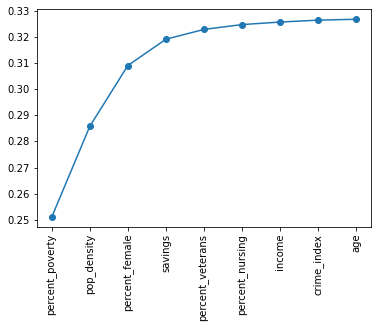

In [11]:
result = best_regressors(9, all_regressors_list)
x = []
y = []

for i in result:
    x.append(i[0])
    y.append(i[1])
    
plt.xticks(rotation=90)
plt.plot(x,y, marker = 'o')

Question 9

For this question, the target column was initially set to zero for all records. After that, a mask was made including all counties that voted 40% or more for bill Clinton, and the target value for those records was switched to 1

In [12]:
df['target'] = 0.0
mask = df['percentVoting'] >= 40
df.loc[mask, 'target'] = 1
df[:5]

,county,percentVoting,age,savings,income,percent_poverty,percent_veterans,percent_female,pop_density,percent_nursing,crime_index,target
0,"Autauga, AL",30.92,31.7,57623,15768,15.2,10.74,51.41,60.4,2.36,457,0.0
1,"Baldwin, AL",26.24,35.5,84935,16954,13.6,9.73,51.34,66.5,5.40,282,0.0
2,"Barbour, AL",46.36,32.8,83656,15532,25.0,8.82,53.03,28.8,7.02,47,1.0
3,"Blount, AL",32.92,34.5,61249,14820,15.0,9.67,51.15,62.4,2.36,185,0.0
4,"Bullock, AL",67.67,31.7,75725,11120,33.0,7.08,50.76,17.6,2.91,141,1.0


Question 10

The data was first split into two design matrices, one as input values and one as output values. From there, the two matricies were split further into training sets comprising 70% of the records, and test sets with 30%.

In [32]:
from sklearn.model_selection import train_test_split 

y, X = dmatrices('target ~ 0 + pop_density + percent_poverty',
                 df,return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X[:5])
print(y[:5])

   pop_density  percent_poverty
0         60.4             15.2
1         66.5             13.6
2         28.8             25.0
3         62.4             15.0
4         17.6             33.0
   target
0     0.0
1     0.0
2     1.0
3     0.0
4     1.0


Question 11

The training and sets that were defined in the previous problem are now used in the KNeighborClassifier function to see the effects of different quantities of nearest neighbors used on the accuracy of the predictive model. The function and prediction was repeated for each of the different quantities of nearest neighbors, first for the training set of data and again for the test set.

In [30]:
from sklearn import neighbors
from sklearn import metrics

model = neighbors.KNeighborsClassifier(n_neighbors=1,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 1')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=3,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 3')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=5,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 5')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=10,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 10')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=20,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 20')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=50,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 50')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=100,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 100')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()

model = neighbors.KNeighborsClassifier(n_neighbors=1000,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train.values.ravel())

print('Number of Neighbors = 1000')
predicted_classes_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, predicted_classes_train))
predicted_classes_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes_test))
print()











Number of Neighbors = 1
0.9978858350951374
0.6009852216748769

Number of Neighbors = 3
0.7880549682875264
0.6354679802955665

Number of Neighbors = 5
0.7484143763213531
0.6305418719211823

Number of Neighbors = 10
0.7204016913319239
0.646551724137931

Number of Neighbors = 20
0.6902748414376322
0.6588669950738916

Number of Neighbors = 50
0.6839323467230444
0.6625615763546798

Number of Neighbors = 100
0.6775898520084567
0.6637931034482759

Number of Neighbors = 1000
0.5671247357293869
0.5763546798029556



Question 12

For this scatter display of data, we plotted the counties showing the variety in population density on the y axis and the differences of poverty percentages on the x axis. We split up the color of the dots so that red dots represent counties with a strong vote for Bill Clinton and blue dots are all others.

After interpreting this data, we noticed that typically the denser and more impoverished a county is, the more likely it is to have a high vote count for Bill Clinton( >= 40%) 

Text(0, 0.5, 'pop_density')

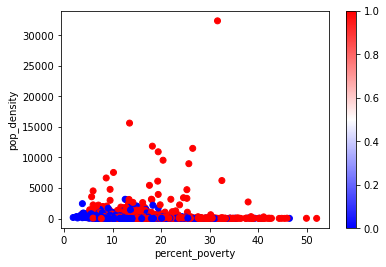

In [29]:
sc = scatter(X['percent_poverty'], X['pop_density'], c=y.values, cmap='bwr')
colorbar(sc)
xlabel('percent_poverty')
ylabel('pop_density')